<a id="1.Summary"></a>
# 1.Summary

Neural Network

<br>

<a id="2.Table of Contents"></a>
# 2.Tabole of Contents
<a href="#1.Summary">Click this Link back to Top</a>

<ol>
    <li><a href="#1.Summary">Summary</a></li>
    <li><a href="#2.Tabole of Contents">Tabole of Contents</a></li>
    <li><a href="#3.Import Function">Import Function</a></li>
    <li><a href="#4.Fit and Plot">Fit and Plot</a></li>
    <li><a href="#5.Performance Measures">Performance Measures</a></li>
    <li><a href="#6.Cross-Validation">Cross-Validation</a></li>
    <li><a href="#7.Pruning">Pruning</a></li>
    <li><a href="#8.Report">Report</a></li>
    <li><a href="#9.Discussion">Discussion</a></li>
    <li><a href="#10.Unused Code">Unused Code</a></li>
</ol>

<a id="3.Import Function"></a>
# 3.Import Function
<a href="#2.Table of Contents">Click this Link back to Top</a>

In [1]:
import copy
import time
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
from IPython.display import Image

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix

<br>

<a id="4.Read and Split"></a>
# 4.Read and Split
<a href="#2.Table of Contents">Click this Link back to Top</a>

In [2]:
def read_split(data_path):
    """
    """
    df = pd.read_csv(data_path)
    # survived, 0=No, 1=Yes  809 not survived, 500 survived
    # slibsp = number of siblings / spouses aboard the Titanic
    # parch = number of parents / children aboard the Titanic
    # fare = Passenger Fare
    # ticket = ticket number (This is total random, i think is irrelevant)
    # cabin = cabin number (This is total random, i think is irrelevant)
    # embarked = Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)
    # body = Body Identification Number (This is total random, i think is irrelevant)
    # home.dest: Home/destination, maybe we need split this column
    # we need decide which columns should be used when we
    
    #**********************Preprocess Data************************
    # Because decision tree only can process numerical data, we change string data into numerical value
    df['pclass'] = df['pclass'].map( {'1st': 1, '2nd': 2, '3rd':3} )
    df['sex'] = df['sex'].map( {'female': 0, 'male': 1} ).astype(int)
    #**********************Preprocess Data************************
    
    # extract features we need
    feature_cols = ['pclass', 'sex','age', 'sibsp', 'survived']
    # 
    df_extract = df[feature_cols]
    # ommit NA exmpale
    df_ommit = df_extract.dropna()
    X = df_ommit[feature_cols]
    label = ['survived']
    y = df_ommit[label]
    X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size =0.2, random_state=1024)
    
    return X_train, X_test, y_train, y_test, df_ommit

In [3]:
# data_path = "03_data/13_Titanic.csv"
# X_train, X_test, y_train, y_test, df_ommit = read_split(data_path)

In [4]:
def nn_model(X_train, X_test, y_train, y_test, l2_penalty = 1e-5, lr= 1e-2):
    """
    l2_penalty is used to shrink the paramters scale
    
    """
    # we have four features, so input units is four. If we need two hidden layer, n_layer will be 4-2 = 2(hiden layer)
    # when early_stopping is True, it will use 10% as validation 
    clf = MLPClassifier(hidden_layer_sizes=(40, 40), \
                        activation = 'logistic', \
                        solver='adam',\
                        alpha=1e-2, \
                        learning_rate = 'constant', \
                        learning_rate_init = lr, \
                        momentum = 0.9, \
#                         n_iter_no_change = 10, \
                        random_state=1024)
    history = clf.fit(X_train.iloc[:,:-1], y_train)
    score = clf.score(X_test.iloc[:,:-1], y_test)
   #clf.predict_proba([[2., 2.], [1., 2.]])
    # using X_train of fours feature columns with the model we have trained ---clf----to get predict result
    # and use argmax to get more bigger index from one row. Finally put it into dataframe
    X_train['train_predit'] = np.argmax(clf.predict_proba(X_train.iloc[:,:-1]), axis=1).reshape(-1,1)
    X_test['train_predit'] = np.argmax(clf.predict_proba(X_test.iloc[:,:-1]), axis=1).reshape(-1,1)
    return score, history, clf, X_train, X_test

In [5]:
def confusion_maxtrx(X_train, X_test, y_train, y_test):
    """
    """
    tn, fp, fn, tp = confusion_matrix(X_train.iloc[:,-1], y_train).ravel()
    print(f"in-sample percent survivors correctly predicted (on training set) is {round(tp/(tp+fn)*100, 2)}%")
    print(f"in-sample percent fatalities correctly predicted (on training set) is {round(tn/(tn+fp)*100, 2)}%")
    tn, fp, fn, tp = confusion_matrix(X_test.iloc[:,-1], y_test).ravel()
    print(f"in-sample percent survivors correctly predicted (on test set) is {round(tp/(tp+fn)*100, 2)}%")
    print(f"in-sample percent fatalities correctly predicted (on test set) is {round(tn/(tn+fp)*100, 2)}%")
    
    return None

In [6]:
def second_model(X_train, X_test, y_train, y_test, l2_penalty = 1e-5, lr= 1e-4):
    """
    l2_penalty is used to shrink the paramters scale
    
    """
    # we have four features, so input units is four. If we need two hidden layer, n_layer will be 4-2 = 2(hiden layer)
    # when early_stopping is True, it will use 10% as validation 
    clf = MLPClassifier(hidden_layer_sizes=(50, 50), \
                        activation = 'logistic', \
                        solver='sgd',\
                        alpha=1e-5, \
                        learning_rate = 'constant', \
                        learning_rate_init = lr, \
                        momentum = 0.99, \
                        early_stopping = True, \
                        n_iter_no_change = 10, \
                        random_state=1024)
    history = clf.fit(X_train.iloc[:,:-1], y_train)
    score = clf.score(X_test.iloc[:,:-1], y_test)
    X_train['train_predit'] = np.argmax(clf.predict_proba(X_train.iloc[:,:-1]), axis=1).reshape(-1,1)
    X_test['train_predit'] = np.argmax(clf.predict_proba(X_test.iloc[:,:-1]), axis=1).reshape(-1,1)
    
    return score, history, clf, X_train, X_test

<a id="9.Main Function"></a>
# 9.Main Function
<a href="#2.Table of Contents">Click this Link back to Top</a>

In [10]:
def main_function():
    """
    """
    data_path = "03_data/13_Titanic.csv"
    # Step 1 Read and Split
    print("*"*30, "Step 1 Read and Split", "*"*30)
    X_train, X_test, y_train, y_test, df = read_split(data_path)
    
    print("*"*40, "Second Model", "*"*40)
#     X_train, X_test, y_train, y_test, df = read_split(data_path)
    score, history, clf, X_train, X_test = second_model(X_train, X_test, y_train, y_test, l2_penalty = 1e-2, lr= 1e-2)
    confusion_maxtrx(X_train, X_test, y_train, y_test)
    print('\n',end='\n')
    
    # Step 2 fit DecisionTree function
    print("*"*30, "Step 3 Check Performance", "*"*30)
    print("*"*40, "First Model", "*"*40)
    X_train, X_test, y_train, y_test, df = read_split(data_path)
    score, history, clf, X_train, X_test = nn_model(X_train, X_test, y_train, y_test, l2_penalty = 1e-2, lr= 1e-2)
    confusion_maxtrx(X_train, X_test, y_train, y_test)
    print('\n',end='\n')
    

#     print("*"*30, "Step 2 fit DecisionTree function", "*"*30)
#     image_path_1 = "04_images/14_titanic_DT.png"
#     clf = fit_plot(X_train, X_test, y_train, y_test, image_path_1)
#     display(Image(filename=image_path_1))
    
#     # Step 3 performance measures
#     print("*"*30, "Step 3 performance measures", "*"*30)
#     measures(X_train, X_test, y_train, y_test, df, clf)
    
#     # Step 4 use cross validation find best paramters
#     print("*"*30, "Step 4 use cross validation find best paramters", "*"*30)
#     top_params = gridsearch(X_train, y_train,clf)
    
#     # Step 5 Prune Tree with best paramtesrs and plot 
#     print("*"*30, "Step 5 Prune Tree with best paramtesrs and plot ", "*"*30)
#     prune_grid = prue_plot(top_params, X_train, X_test, y_train, y_test)
#     plt.show()
    
#     # Step 6 plot best pruning tree model 
#     print("*"*30, "Step 6 plot best pruning tree model ", "*"*30)
#     image_path_2 = "04_images/15_Best_DescionTree.png"
#     #clf = DecisionTreeClassifier(max_depth=4,**prune_grid)
#     clf_history = fit_plot(X_train, X_test, y_train, y_test, image_path_2, prune_grid)
#     display(Image(filename=image_path_2))
    return df, score, history, clf, X_train, X_test
    

In [11]:
if __name__=="__main__":
    df, score, history, clf, X_train, X_test = main_function()

****************************** Step 1 Read and Split ******************************
**************************************** Second Model ****************************************
in-sample percent survivors correctly predicted (on training set) is 88.89%
in-sample percent fatalities correctly predicted (on training set) is 58.52%
in-sample percent survivors correctly predicted (on test set) is 100.0%
in-sample percent fatalities correctly predicted (on test set) is 64.42%


****************************** Step 3 Check Performance ******************************
**************************************** First Model ****************************************


D:\ProgramData\Anaconda3\envs\06_ten_GPU_22\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
D:\ProgramData\Anaconda3\envs\06_ten_GPU_22\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


in-sample percent survivors correctly predicted (on training set) is 83.56%
in-sample percent fatalities correctly predicted (on training set) is 80.33%
in-sample percent survivors correctly predicted (on test set) is 87.5%
in-sample percent fatalities correctly predicted (on test set) is 82.47%




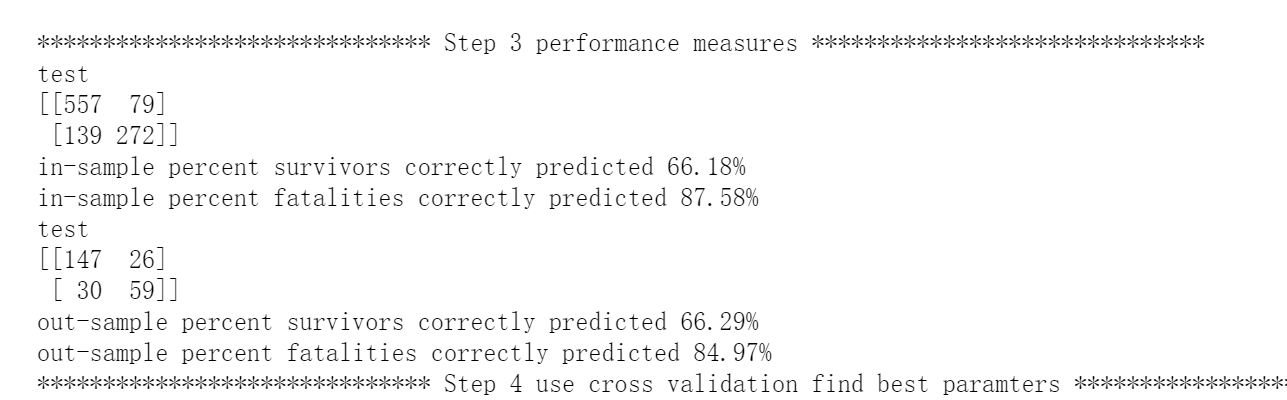

In [9]:
Image("04_images/16_DT.png")

<a id="10. Step 4 Compare"></a>
# 10. Step 4 Compare
<a href="#2.Table of Contents">Click this Link back to Top</a>

The fatalities have no siginificant different accuracy for both algorightm. But, at survivors part, Neural Network is performance better than Decision Tree. 

In [12]:
score

0.8380952380952381

For the accuracy aspect, Neural Network can reach 83.81% mean accuracy, Decsion Tree can only get 79% accuracy